# Part 1
## Tabular Q-learning

### A gridworld environment

In order to build some intuition about RL methods, we are going to begin with a value function approximator method: Q-learning. To keep things simple we are going to implement Q-learning in its tabular form (i.e. without any function approximation).

The first environment we are going to study is a discrete-space grid-world.

In [1]:
# We begin by importing the required python modules: numpy, matplotlib and the gridworld environment.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from envs.environments import cliff_walking

First we create an instance of the environment and we render it to see what we are dealing with.

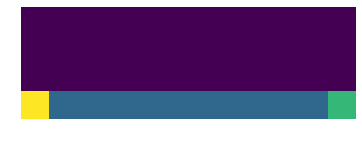

In [2]:
# Create an instance of the environment
env = cliff_walking()
env.reset()
# Lets render the enviroment to see what we are dealing with
env_map = env.render()
plt.figure()
plt.imshow(env_map,cmap='viridis');
plt.axis('off');

The agent (yellow) is going to be trained to achieve the goal cell (green). The obstacles (blue) are places where the agent cannot move to. The agent is inialized randomly in any of the empty cells (dark-purple).

The agent can execute 4 actions: 0-UP, 1-RIGHT, 2-DOWN, 3-LEFT. Each action drives the agent one cell in the corresponding direction. If the agent attemps to move towards an obstacle or the limit of the gridworld, it will remain at its current position.

The environment provides the agent with the following reward:
* R = 1.0 if the agent achieves the goal.
* R = 0.0 otherwhise.

In [30]:
class grid_world_v1(cliff_walking):
    def reward(self):
        agent, target = self.observe()
        if agent==target:
            return 0.0
        elif agent in self._cliff:
            return -100.0
        else:
            return -1.0
    
class grid_world_v1(cliff_walking):
    def reward(self):
        agent, target = self.observe()
        if agent==target:
            return 0.0
        elif agent in self._cliff:
            return -1.0
        else:
            return -0.01

### How to train the agent?
As mentioned before we are going to approximate the value function of the agent following a greedy policy (executing always the action that provides more value).

So we are going to learn the mapping: $S\times A\rightarrow \mathbb{R}$

In [4]:
from agents.Qlearning import tabular_Qlearning
from utilities import plot_policies

In [5]:
class our_Qlearning(tabular_Qlearning):
    def train(self,state,action,next_state,reward,done):
        if (not done):
            BE = reward + self._gamma*np.amax(self.Qtable[next_state,:]) - self.Qtable[state,action]
        else:
            BE = reward - self.Qtable[state,action]
        self.Qtable[state,action] += self._alpha*BE
        return 0.5*np.square(BE)

______________________
UP, RIGHT, DOWN, LEFT


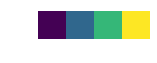

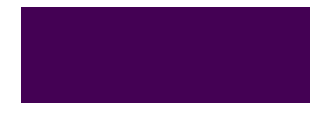

In [13]:
n_states = env.num_states
n_actions = env.num_actions
agent = our_Qlearning(n_states,n_actions,lr=0.1)
policy = [agent.get_policy()]
plot_policies(env,policy,size=(30,10))


### Training the agent

In [25]:
def run_training(env,agent,max_episodes,max_steps,start='standar'):
    np.random.seed(1234) # Fixed random seed
    policies = []
    for episode in range(max_episodes+1):
        state = env.reset(start)
        done = False
        step = 1
        policies.append(agent.get_policy())
        while (not done and step <= max_steps):
            action = agent.epsilon_greedy(state)
            next_state,reward,done = env.step(action)
            agent.train(state,action,next_state,reward,done)
            state = next_state
            step += 1
        agent.epsilon_decay(rate=0.995,min=0.01)
        agent.alpha_decay(rate=0.999,min=0.01)
        if(episode%(max_episodes/10)==0):
            print('Episode: ',episode,' Steps: ',step,
                  ' Exploration: ',np.round(agent._epsilon,2),' L.R: ',np.round(agent._alpha,2))
    return policies
        

Episode:  0  Steps:  18  Exploration:  1.0  L.R:  0.1
Episode:  100  Steps:  20  Exploration:  0.6  L.R:  0.09
Episode:  200  Steps:  38  Exploration:  0.37  L.R:  0.08
Episode:  300  Steps:  19  Exploration:  0.22  L.R:  0.07
Episode:  400  Steps:  33  Exploration:  0.13  L.R:  0.07
Episode:  500  Steps:  25  Exploration:  0.08  L.R:  0.06
Episode:  600  Steps:  33  Exploration:  0.05  L.R:  0.05
Episode:  700  Steps:  16  Exploration:  0.03  L.R:  0.05
Episode:  800  Steps:  14  Exploration:  0.02  L.R:  0.04
Episode:  900  Steps:  14  Exploration:  0.01  L.R:  0.04
Episode:  1000  Steps:  14  Exploration:  0.01  L.R:  0.04
______________________
UP, RIGHT, DOWN, LEFT


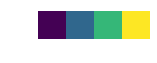

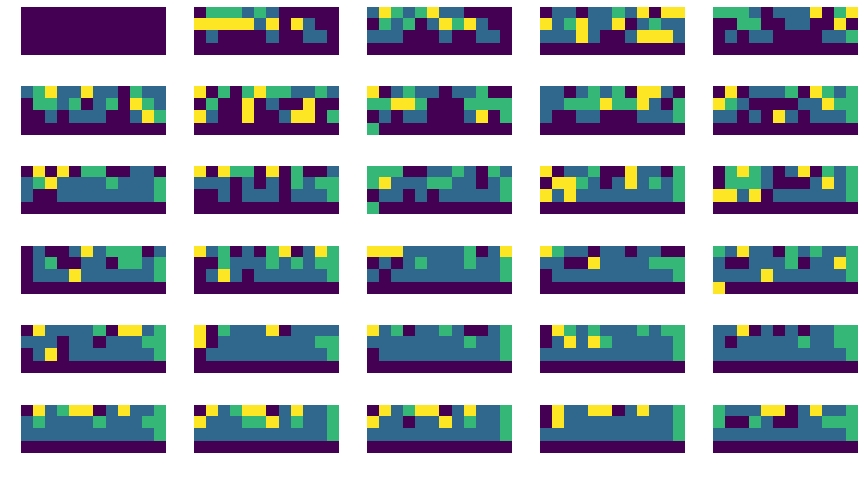

In [34]:
env = grid_world_v1()
agent.reset()
episodes = 1000
steps = 500
policies = run_training(env,agent,episodes,steps)
num_policies = len(policies)
indexes = list(np.linspace(0,num_policies-1,30).astype(int))
policies2plot = []
for i in indexes:
    policies2plot.append(policies[i])
plot_policies(env,policies2plot,size=(15,10))        